In [14]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

In [15]:
#Criação dos exemplos/amostras
M = 1000

x1t = np.random.normal(0, 1, (M,1))
x2t = np.random.normal(10, 10, (M,1))

x1v = np.random.normal(0, 1, (M,1))
x2v = np.random.normal(10, 10, (M,1))

yt = x1t + x2t
yv = x1v + x2v

In [16]:
# Closed Form
X_t = np.c_[x1t, x2t]

a_opt = np.linalg.pinv(np.transpose(X_t).dot(X_t)).dot(np.transpose(X_t).dot(yt))
yhat = a_opt[0, 0]*x1t + a_opt[1, 0]*x2t
Joptimum = (1/M)*np.sum(np.power((yt - yhat), 2))

In [17]:
# Batch gradient descent solution

# Learning Rate
alpha = 0.004

# Max. number of interactions
n_iterations = 2000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(yt - X_t.dot(a), 2))

#Loop batch
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))

while iteration < n_iterations or error > 0.001:
    gradients = -2/M * X_t.T.dot(yt - X_t.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (yt - X_t.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

<IPython.core.display.Javascript object>


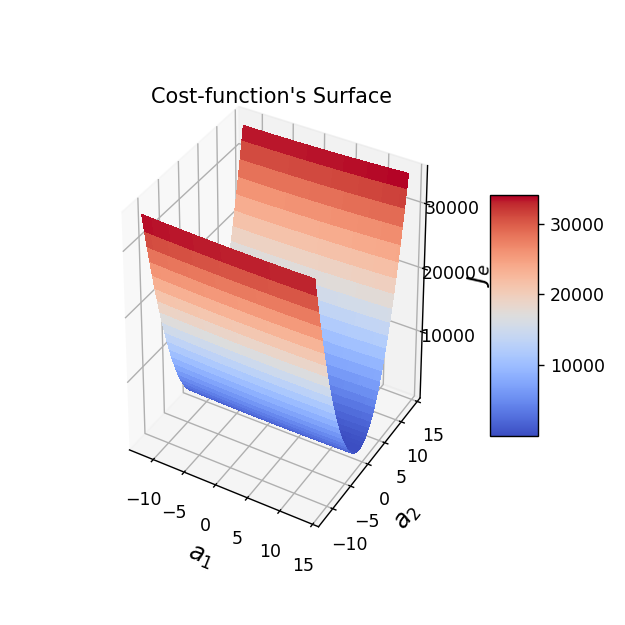

In [18]:
#Error Surface initialization
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1t + A2[iter1][iter2]*x2t
        J[iter1][iter2] = (1/M)*np.sum( np.square(yt - yhat))
        
# Error Surface

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


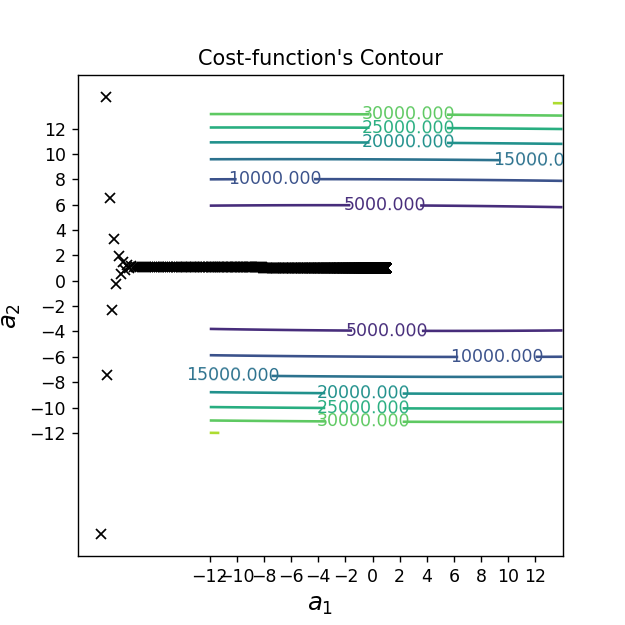

In [19]:
# error surface 2d

fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


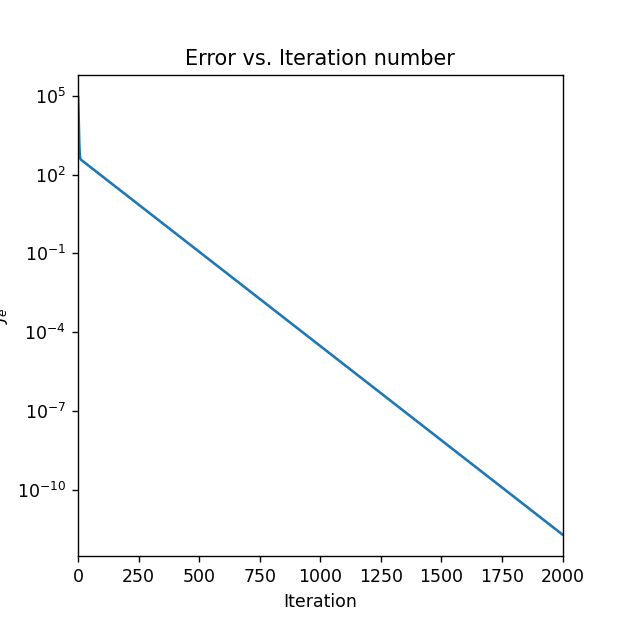

In [20]:
# Error x iteration plot
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [21]:
#Escalonamento utilizando o método min-max
x1t_max = np.amax(x1t)
x1t_min = np.amin(x1t)
x2t_max = np.amax(x2t)
x2t_min = np.amin(x2t)

x1t_escalonado = (x1t - x1t_min)/(x1t_max - x1t_min)
x2t_escalonado = (x2t - x2t_min)/(x2t_max - x2t_min)
yt = x1t_escalonado + x2t_escalonado
 
x1v_escalonado = (x1v - x1t_min)/(x1t_max - x1t_min)
x2v_escalonado = (x2v - x2t_min)/(x2t_max - x2t_min)
yv = x1v_escalonado + x2v_escalonado

In [22]:
# Closed Form
Xt_escalonado = np.c_[x1t_escalonado, x2t_escalonado]

a_opt = np.linalg.pinv(np.transpose(Xt_escalonado).dot(Xt_escalonado)).dot(np.transpose(Xt_escalonado).dot(yt))
yhat = a_opt[0, 0]*x1t_escalonado + a_opt[1, 0]*x2t_escalonado
Joptimum = (1/M)*np.sum(np.power((yt - yhat), 2) )

In [23]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.06

#Número máximo de iterações
n_iterations = 2000

#Criação de vetor para armazenar e inicializar os parâmetros a
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Criar vetor para armazenar o histórico dos valores de erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(yt - Xt_escalonado.dot(a), 2))

#Inicialização de variáveis do loop
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))

while iteration < n_iterations or error > 0.001:
    gradients = -2/M * Xt_escalonado.T.dot(yt - Xt_escalonado.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (yt - Xt_escalonado.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

<IPython.core.display.Javascript object>


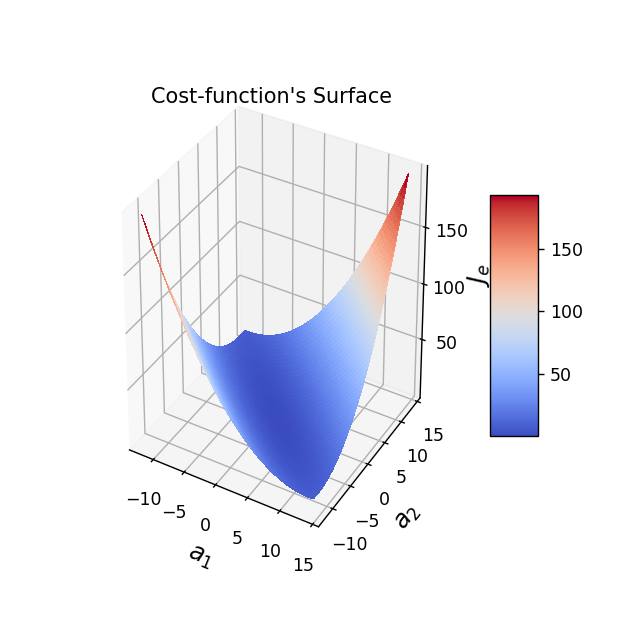

In [26]:
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1t_escalonado + A2[iter1][iter2]*x2t_escalonado
        J[iter1][iter2] = (1/M)*np.sum( np.square(yt - yhat)  )
        
        
#Superfície de erro com features escalonadas utilizando min-max

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


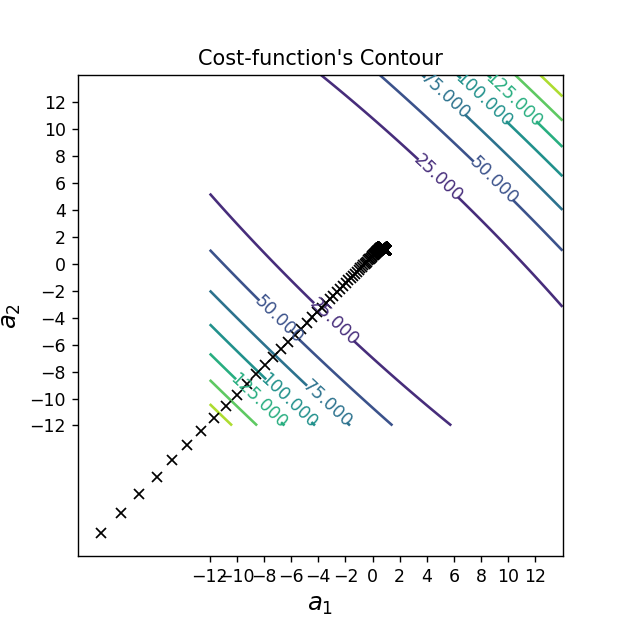

In [27]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


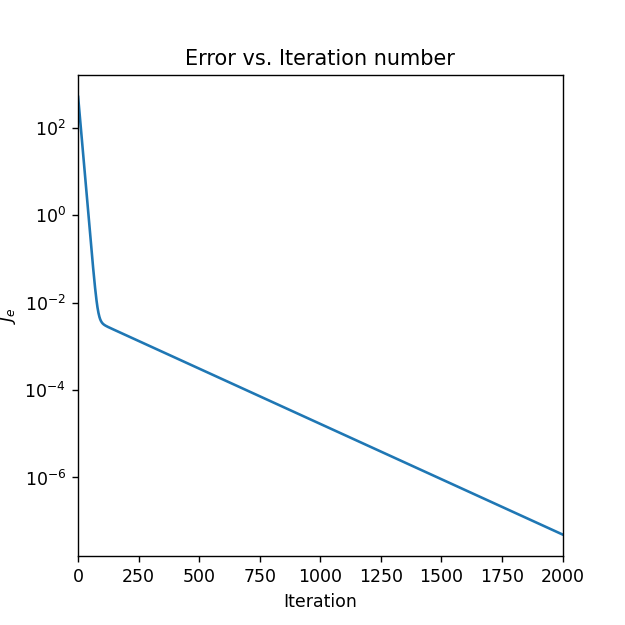

In [28]:
# Error x iterations plot
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [29]:
#Escalonamento utilizando a padronização
x1t_padronizado = (x1t - np.mean(x1t)) / np.std(x1t)
x2t_padronizado = ((x2t - np.mean(x2t)) / np.std(x2t))

yt = x1t_padronizado + x2t_padronizado

x1v_padronizado = (x1v - np.mean(x1t)) / np.std(x1t)
x2v_padronizado = ((x2v - np.mean(x2t)) / np.std(x2t))

yv = x1v_padronizado + x2v_padronizado

In [30]:
# Closed-form solution.

Xt_padronizado = np.c_[x1t_padronizado, x2t_padronizado]

a_opt = np.linalg.pinv(np.transpose(Xt_padronizado).dot(Xt_padronizado)).dot(np.transpose(Xt_padronizado).dot(yt))
yhat = a_opt[0, 0]*x1t_padronizado + a_opt[1, 0]*x2t_padronizado
Joptimum = (1/M)*np.sum(np.power((yt - yhat), 2) )

In [31]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.06

#Número máximo de iterações
n_iterations = 2000

#Criação de vetor para armazenar e inicializar os parâmetros a
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Criar vetor para armazenar o histórico dos valores de erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(yt - Xt_padronizado.dot(a), 2))

#Inicialização de variáveis do loop
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))


while iteration < n_iterations or error > 0.001:
    gradients = -2/M * Xt_padronizado.T.dot(yt - Xt_padronizado.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (yt - Xt_padronizado.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

<IPython.core.display.Javascript object>


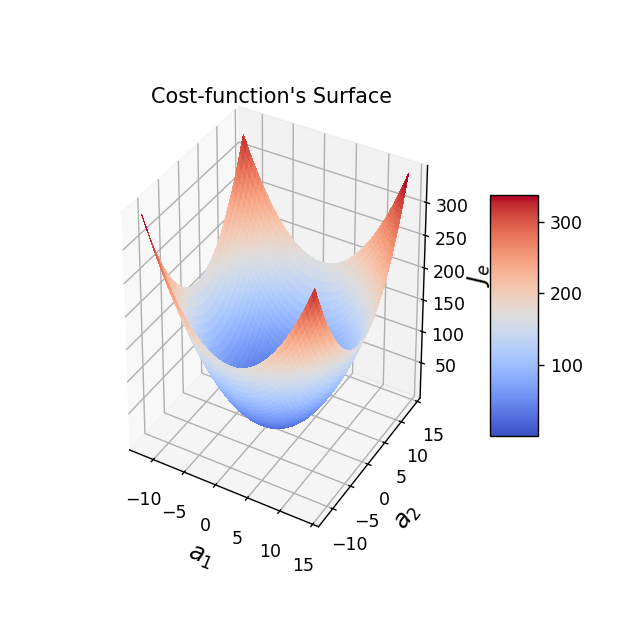

In [33]:
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1t_padronizado + A2[iter1][iter2]*x2t_padronizado
        J[iter1][iter2] = (1/M)*np.sum( np.square(yt - yhat)  )
        
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


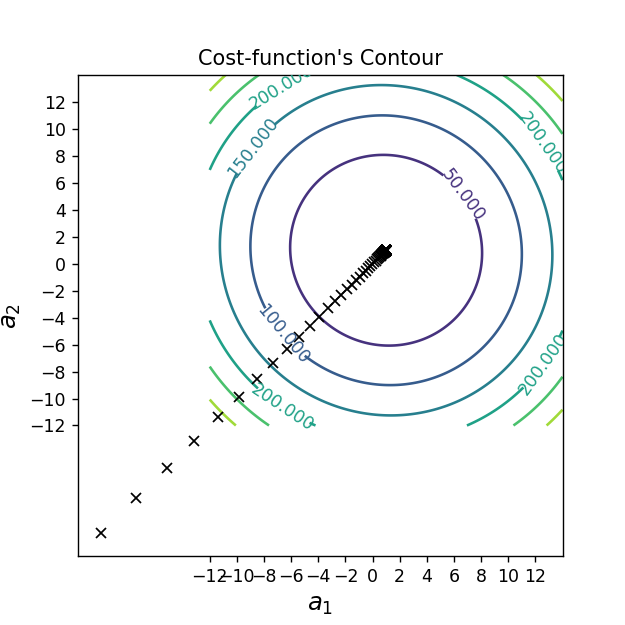

In [35]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


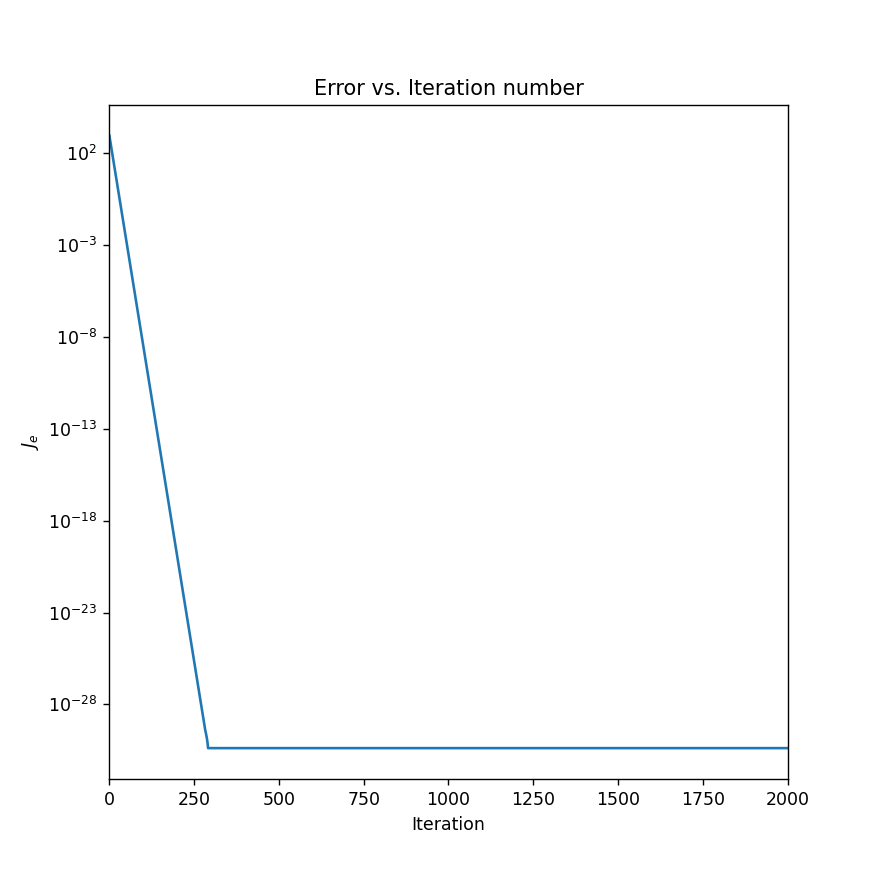

In [36]:
# Error x iterations

fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [37]:
# Letra D
#Escalonamento utilizando o método min-max para labels
yt_minmax = (yt - np.amin(yt)) / (np.amax(yt) - np.amin(yt))

yv_minmax = (yt - np.amin(yv)) / (np.amax(yv) - np.amin(yt))

In [38]:
# Closed-form solution.

Xt_escalonado = np.c_[x1t_escalonado, x2t_escalonado]

a_opt = np.linalg.pinv(np.transpose(Xt_escalonado).dot(Xt_escalonado)).dot(np.transpose(Xt_escalonado).dot(yt_minmax))
yhat = a_opt[0, 0]*x1t_escalonado + a_opt[1, 0]*x2t_escalonado
Joptimum = (1/M)*np.sum(np.power((yt_minmax - yhat), 2) )

In [39]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.06

#Número máximo de iterações
n_iterations = 2000

#Criação de vetor para armazenar e inicializar os parâmetros a
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Criar vetor para armazenar o histórico dos valores de erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(yt_minmax - Xt_escalonado.dot(a), 2))

#Inicialização de variáveis do loop
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))


while iteration < n_iterations or error > 0.001:
    gradients = -2/M * Xt_escalonado.T.dot(yt_minmax - Xt_escalonado.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (yt_minmax - Xt_escalonado.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

<IPython.core.display.Javascript object>


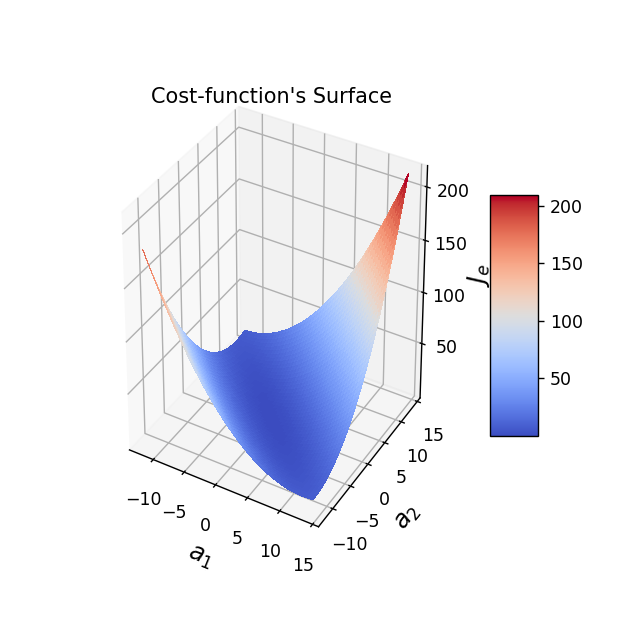

In [41]:
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1t_escalonado + A2[iter1][iter2]*x2t_escalonado
        J[iter1][iter2] = (1/M)*np.sum( np.square(yt_minmax - yhat)  )
        
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


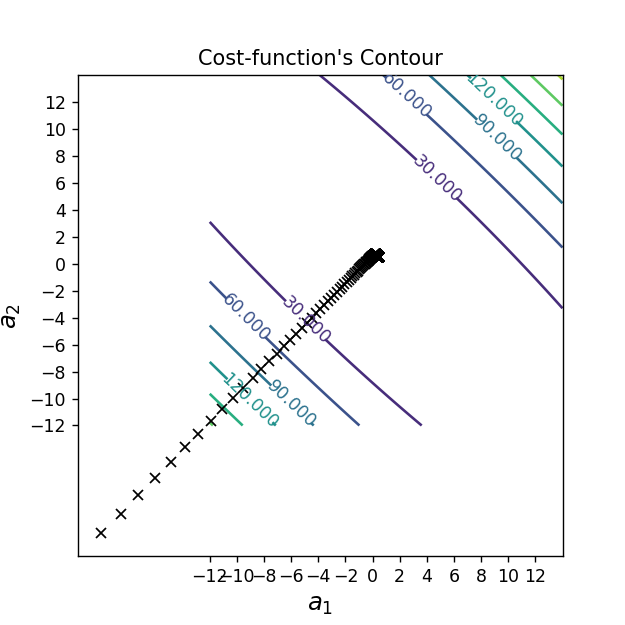

In [42]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


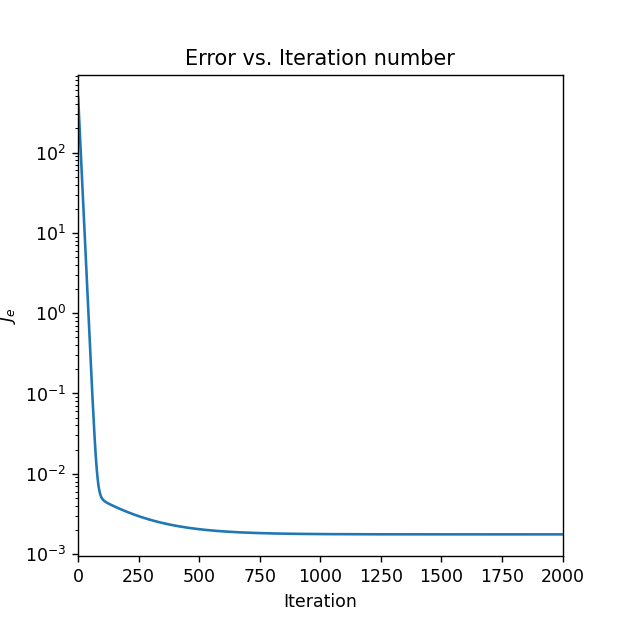

In [44]:
#Error x iterations

fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [45]:
#Escalonamento por padronização nos labels
yt_padronizacao = (yt - np.mean(yt)) / np.std(yt)

yv_padronizacao = (yv - np.mean(yv)) / np.std(yv)

In [46]:
# Closed-form solution.

Xt_padronizado = np.c_[x1t_padronizado, x2t_padronizado]

a_opt = np.linalg.pinv(np.transpose(Xt_padronizado).dot(Xt_padronizado)).dot(np.transpose(Xt_padronizado).dot(yt_padronizacao))
yhat = a_opt[0, 0]*x1t_padronizado + a_opt[1, 0]*x2t_padronizado
Joptimum = (1/M)*np.sum(np.power((yt_padronizacao - yhat), 2) )

In [47]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.06

#Número máximo de iterações
n_iterations = 2000

#Criação de vetor para armazenar e inicializar os parâmetros a
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Criar vetor para armazenar o histórico dos valores de erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(yt_padronizacao - Xt_padronizado.dot(a), 2))

#Inicialização de variáveis do loop
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))


while iteration < n_iterations or error > 0.001:
    gradients = -2/M * Xt_padronizado.T.dot(yt_padronizacao - Xt_padronizado.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (yt_padronizacao - Xt_padronizado.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

<IPython.core.display.Javascript object>


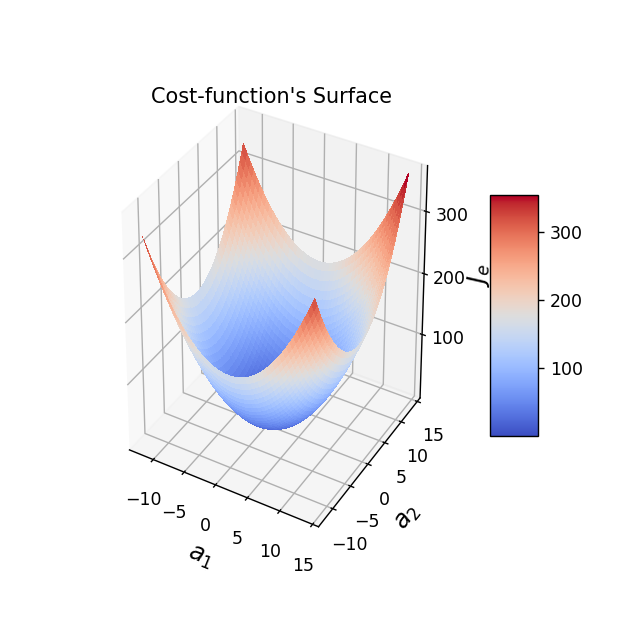

In [48]:
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1t_padronizado + A2[iter1][iter2]*x2t_padronizado
        J[iter1][iter2] = (1/M)*np.sum( np.square(yt_padronizacao - yhat)  )
        
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


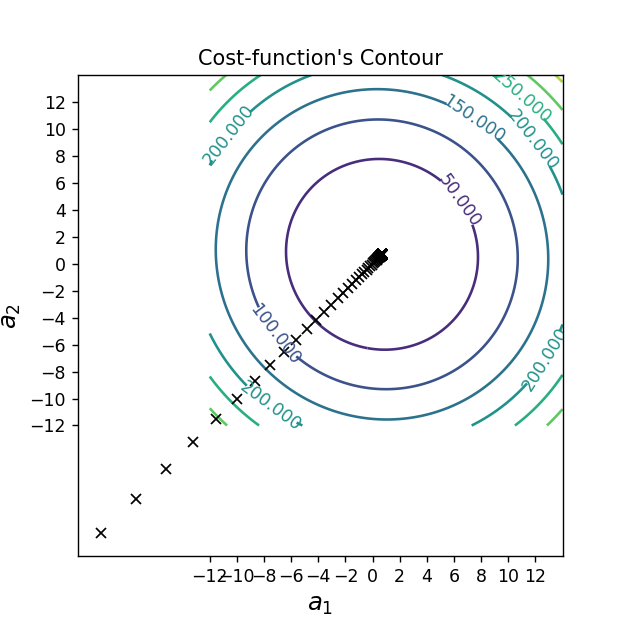

In [49]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


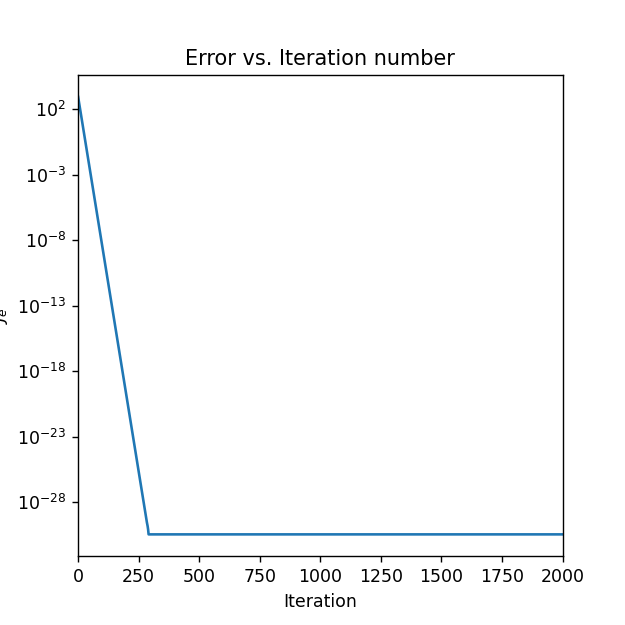

In [50]:
# Error x iterations

fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [ ]:
'''
Letra E

O escalonamento das features é capaz de auxiliar diretamente na adaptação da superfície de erro, pois este consegue adaptar as
features para uma mesma escala, permitindo que seja plotado uma superfície de erro regular, por onde pode ser aplicado o 
algoritmo de batch para convergir no ponto de menor erro da função. Se as features não são escalonadas, esta superfície de erro
é então plotada de forma irregular, assim não permitindo que o algoritmo consiga convergir no ponto correto.

Ao utilizar os dois métodos para o escalonamento nas labels, pode-se então otimizar o valor do erro, dessa forma conseguindo
reduzi-lo.

O método do escalonamento min-máx melhorou as respostas referentes ao erro, mais ainda não foi suficiente para melhorar
o plot da superfície. Porém, quando é aplicada a padronização, a superfície conseguiu atingir a melhor forma, sendo agora
possível chegar ao melhor desempenho.
 

'''